### **PROBLEM STATEMENT**

Belum memiliki strategi yang tepat untuk menawarkan jenis produk yang sesuai dengan segmen calon nasabah yang akan direkrut

### **OBJECTIVE**

Membuat Sebuah Model Clustering untuk mengetahui kepemilikan produk berdasarkan demografi nasabah yang saat ini sudah menggunakan layanan FundFusion dengan Silhouette Score >0.7


### **VARIABEL YANG TERSEDIA**

Dari dataset yang dimiliki terdapat beberapa data yang tersedia:


---
**1. GCIF                     :** Unique Identifier Nasabah\
**2. Area                     :** Lokasi Nasabah (Jakarta,Bogor,Bandung,Surabaya,Jogja,Solo)\
**3. Jalur_Pembukaan          :** Touch Points Nasabah membuka produk --> Cabang, Telemarketing, Aplikasi Digital, Internet Banking\
**4. Vintage                  :** Durasi Menjadi Nasabah (Sejak membuka akun)\
**5. Usia                     :** Usia Nasabah\
**6. Jenis_Kelamin            :** Laki-laki (1) & Perempuan (0)\
**7. Status_Perkawinan        :** Belum Menikah (0), Menikah (1), Cerai (2), Janda/Duda (3)\
**8. Jumlah_Anak              :** Jumlah Anak Nasabah (numerik)\
**9. Pendidikan               :** Status Pendidikan Terakhir --> Tidak Memiliki Pendidikan Formal (0), SD (1), SMP (2), SMA (3), Sarjana (4), Magister (5), Doktor (6)\
**10. Produk_Tabungan         :** Status Kepemilikan Produk (Yes/1, No/0)\
**11. Produk_Deposito         :** Status Kepemilikan Produk (Yes/1, No/0)\
**12. Produk_Kartu_Kredit     :** Status Kepemilikan Produk (Yes/1, No/0)\
**13. Produk_Kredit_Rumah     :** Status Kepemilikan Produk (Yes/1, No/0)\
**14. Produk_Kredit_Kendaraan :** Status Kepemilikan Produk (Yes/1, No/0)\
**15. Produk_Kredit_Dana_Tunai:** Status Kepemilikan Produk (Yes/1, No/0)\
**16. Total_Kepemilikan_Produk:** Jumlah Produk Yang Dimiliki (Penjumlahan dari Produk2)\
**17. Pendapatan_Tahunan      :** Rata-rata Pendapatan Dalam Setahun\
**18. Total_Relationship_Balance :** Total Asset Nasabah dalam Cutoff Bulan Observasi\





# **EXPERIMENT**

Point of View:
1. Dikelompokkan berdasarkan demografis untuk dicari pattern kepemilikan produk
2. Dikelompookan berdasarkan kepemilikan produk untuk dicari patter berdasarkan demografisnya

# **IMPORT PACKAGE**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
pd.set_option('display.max_columns', None)

# **Data For Clustering**

In [ ]:
path_1 = "clustering_data.csv"
data = pd.read_csv(path_1)
data

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,G28036,Bogor,Internet Banking,< 1 Tahun,69.0,Laki-laki,Menikah,3,Doktor,1,0,0,0,0,0,1,747,44607
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
3,G04482,Bandung,Cabang,< 1 Tahun,45.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,431,417250579
4,G07807,Bandung,Aplikasi Digital,< 1 Tahun,34.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,184,453573593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28124,G14522,Solo,Cabang,2 - 3 Tahun,47.0,Perempuan,Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,1,6,364,600734753
28125,G15052,Bandung,Telemarketing,2 - 3 Tahun,38.0,Perempuan,Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,1,6,350,764670896
28126,G06299,Jogja,Internet Banking,2 - 3 Tahun,58.0,Laki-laki,Cerai,4,Tidak Sekolah Formal,1,1,1,1,1,1,6,365,629634394
28127,G17962,Jakarta,Telemarketing,2 - 3 Tahun,NaN,Perempuan,Janda/Duda,1,Tidak Sekolah Formal,1,1,1,1,1,1,6,225,423564729


# **Data Understanding**

In [ ]:
data.dtypes

GCIF                           object
Area                           object
Jalur_Pembukaan                object
Vintage                        object
Usia                          float64
Jenis_Kelamin                  object
Status_Perkawinan              object
Jumlah_Anak                     int64
Pendidikan                     object
Produk_Tabungan                 int64
Produk_Deposito                 int64
Produk_Kartu_Kredit             int64
Produk_Kredit_Rumah             int64
Produk_Kredit_Kendaraan         int64
Produk_Kredit_Dana_Tunai        int64
Total_Kepemilikan_Produk        int64
Pendapatan_Tahunan              int64
Total_Relationship_Balance      int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28129 entries, 0 to 28128
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GCIF                        28129 non-null  object 
 1   Area                        28129 non-null  object 
 2   Jalur_Pembukaan             28129 non-null  object 
 3   Vintage                     28129 non-null  object 
 4   Usia                        24084 non-null  float64
 5   Jenis_Kelamin               28129 non-null  object 
 6   Status_Perkawinan           28129 non-null  object 
 7   Jumlah_Anak                 28129 non-null  int64  
 8   Pendidikan                  28129 non-null  object 
 9   Produk_Tabungan             28129 non-null  int64  
 10  Produk_Deposito             28129 non-null  int64  
 11  Produk_Kartu_Kredit         28129 non-null  int64  
 12  Produk_Kredit_Rumah         28129 non-null  int64  
 13  Produk_Kredit_Kendaraan     281

In [ ]:
data.groupby(('Area'))['Area'].count()

Area
Bandung     6917
Bogor       1191
Jakarta     7017
Jogja       3001
Solo        5001
Surabaya    5002
Name: Area, dtype: int64

In [ ]:
data.groupby(('Vintage'))['Vintage'].count()

Vintage
2 - 3 Tahun    13953
< 1 Tahun       9278
> 4 Tahun       4898
Name: Vintage, dtype: int64

In [ ]:
data.groupby(('Jalur_Pembukaan'))['Jalur_Pembukaan'].count()

Jalur_Pembukaan
Aplikasi Digital     6216
Cabang               5856
Internet Banking     5795
Telemarketing       10262
Name: Jalur_Pembukaan, dtype: int64

In [ ]:
data.groupby('Status_Perkawinan')['Status_Perkawinan'].count()

Status_Perkawinan
Belum Menikah     8168
Cerai             4077
Janda/Duda        4045
Menikah          11839
Name: Status_Perkawinan, dtype: int64

# **Data Preparation**

## Pengecekan Data Duplikat dan *Missing Data*

In [ ]:
data.isnull().sum()

GCIF                             0
Area                             0
Jalur_Pembukaan                  0
Vintage                          0
Usia                          4045
Jenis_Kelamin                    0
Status_Perkawinan                0
Jumlah_Anak                      0
Pendidikan                       0
Produk_Tabungan                  0
Produk_Deposito                  0
Produk_Kartu_Kredit              0
Produk_Kredit_Rumah              0
Produk_Kredit_Kendaraan          0
Produk_Kredit_Dana_Tunai         0
Total_Kepemilikan_Produk         0
Pendapatan_Tahunan               0
Total_Relationship_Balance       0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

GCIF                          0
Area                          0
Jalur_Pembukaan               0
Vintage                       0
Usia                          0
Jenis_Kelamin                 0
Status_Perkawinan             0
Jumlah_Anak                   0
Pendidikan                    0
Produk_Tabungan               0
Produk_Deposito               0
Produk_Kartu_Kredit           0
Produk_Kredit_Rumah           0
Produk_Kredit_Kendaraan       0
Produk_Kredit_Dana_Tunai      0
Total_Kepemilikan_Produk      0
Pendapatan_Tahunan            0
Total_Relationship_Balance    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

## Pengecekan Data Outlier

In [ ]:
data.count()

GCIF                          24084
Area                          24084
Jalur_Pembukaan               24084
Vintage                       24084
Usia                          24084
Jenis_Kelamin                 24084
Status_Perkawinan             24084
Jumlah_Anak                   24084
Pendidikan                    24084
Produk_Tabungan               24084
Produk_Deposito               24084
Produk_Kartu_Kredit           24084
Produk_Kredit_Rumah           24084
Produk_Kredit_Kendaraan       24084
Produk_Kredit_Dana_Tunai      24084
Total_Kepemilikan_Produk      24084
Pendapatan_Tahunan            24084
Total_Relationship_Balance    24084
dtype: int64

In [ ]:
from scipy import stats

z_scores = stats.zscore(data[['Usia', 'Pendapatan_Tahunan', 'Total_Relationship_Balance']])
data = data[(z_scores < 3).all(axis=1)]

In [ ]:
data.count()

GCIF                          23704
Area                          23704
Jalur_Pembukaan               23704
Vintage                       23704
Usia                          23704
Jenis_Kelamin                 23704
Status_Perkawinan             23704
Jumlah_Anak                   23704
Pendidikan                    23704
Produk_Tabungan               23704
Produk_Deposito               23704
Produk_Kartu_Kredit           23704
Produk_Kredit_Rumah           23704
Produk_Kredit_Kendaraan       23704
Produk_Kredit_Dana_Tunai      23704
Total_Kepemilikan_Produk      23704
Pendapatan_Tahunan            23704
Total_Relationship_Balance    23704
dtype: int64

## Filtering Data Telemarketing Only

In [ ]:
data0 = data[data['Jalur_Pembukaan'] == 'Telemarketing']

In [ ]:
data0 = data0.drop(columns=['GCIF', 'Jalur_Pembukaan']).reset_index(drop=True)
data0 = data0.reset_index()
data0

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
1,1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
2,2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
3,3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
4,4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
8649,8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
8650,8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
8651,8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


In [ ]:
data1 = data0.iloc[:, 1:8]
data1

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal
8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal
8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal
8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal


## Pembagian Dataset Experiment
1. Experiment 0 --> Semua Variabel Digunakan
2. Experiment 1 --> Menggunakan Demographics
3. Experiment 2 --> Menggunakan Financial Related Variable

In [ ]:
data1 = data0.iloc[:, 1:8]
data1

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal
8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal
8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal
8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal


In [ ]:
data2 = data0.iloc[:,8:17]
data2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...
8648,1,1,1,1,0,1,5,489,321693904
8649,1,1,1,1,1,0,5,658,224477967
8650,1,1,1,1,0,1,5,585,411871605
8651,1,1,0,1,1,1,5,279,161744694


## Melakukan Encoding untuk Data Category

In [ ]:
data1 = pd.get_dummies(data1, columns=['Area', 'Jenis_Kelamin', 'Status_Perkawinan', 'Pendidikan', 'Vintage'])
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Status_Perkawinan_Menikah,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
1,30.0,0,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
2,29.0,0,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
3,49.0,0,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
4,21.0,0,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False
8649,58.0,0,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False
8650,42.0,3,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False
8651,44.0,1,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False


In [ ]:
data1.dtypes

Usia                               float64
Jumlah_Anak                          int64
Area_Bandung                          bool
Area_Bogor                            bool
Area_Jakarta                          bool
Area_Jogja                            bool
Area_Solo                             bool
Area_Surabaya                         bool
Jenis_Kelamin_Laki-laki               bool
Jenis_Kelamin_Perempuan               bool
Status_Perkawinan_Belum Menikah       bool
Status_Perkawinan_Cerai               bool
Status_Perkawinan_Menikah             bool
Pendidikan_Doktor                     bool
Pendidikan_Magister                   bool
Pendidikan_SD                         bool
Pendidikan_SMA                        bool
Pendidikan_SMP                        bool
Pendidikan_Sarjana                    bool
Pendidikan_Tidak Sekolah Formal       bool
Vintage_2 - 3 Tahun                   bool
Vintage_< 1 Tahun                     bool
Vintage_> 4 Tahun                     bool
dtype: obje

In [ ]:
predname_num = data2.columns
predname_num

Index(['Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit',
       'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X_num = pd.DataFrame(SS.fit_transform(data2))
X_num

,0,1,2,3,4,5,6,7,8
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


In [ ]:
X_num.columns = predname_num
X_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


## Pengecekan Korelasi

In [ ]:
corr_test1 = data1.corr().abs()
corr_test2 = X_num.corr().abs()

In [ ]:
corr_test1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Status_Perkawinan_Menikah,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
Usia,1.000000,0.105752,0.015472,0.010122,0.000703,0.004196,0.009153,0.000800,0.022998,0.022998,0.182525,0.269976,0.027666,0.019497,0.002532,0.017649,0.007478,0.000769,0.009315,0.023562,0.009375,0.014677,0.005059
Jumlah_Anak,0.105752,1.000000,0.004419,0.008073,0.006375,0.003399,0.000538,0.020592,0.004123,0.004123,0.637109,0.210638,0.448296,0.010529,0.012402,0.002656,0.005471,0.004266,0.001571,0.012021,0.012883,0.000549,0.015414
Area_Bandung,0.015472,0.004419,1.000000,0.075688,0.434134,0.129781,0.165969,0.173396,0.005038,0.005038,0.001969,0.004996,0.001850,0.004182,0.018846,0.009738,0.008150,0.008533,0.002294,0.003398,0.004687,0.007997,0.003280
Area_Bogor,0.010122,0.008073,0.075688,1.000000,0.160824,0.048077,0.061483,0.064234,0.017781,0.017781,0.017977,0.007205,0.011709,0.014371,0.018786,0.005275,0.019397,0.005195,0.001137,0.011784,0.006728,0.011535,0.004774
Area_Jakarta,0.000703,0.006375,0.434134,0.160824,1.000000,0.275762,0.352656,0.368437,0.016156,0.016156,0.003612,0.000622,0.002968,0.006520,0.004666,0.005406,0.001637,0.021187,0.003183,0.004680,0.000667,0.002865,0.002436
Area_Jogja,0.004196,0.003399,0.129781,0.048077,0.275762,1.000000,0.105423,0.110141,0.000914,0.000914,0.004833,0.011100,0.003675,0.001621,0.012903,0.014696,0.005862,0.002432,0.017757,0.003543,0.001066,0.001924,0.000867
Area_Solo,0.009153,0.000538,0.165969,0.061483,0.352656,0.105423,1.000000,0.140853,0.001620,0.001620,0.018026,0.001115,0.016291,0.012661,0.008184,0.002844,0.000952,0.013671,0.004444,0.016788,0.023666,0.008069,0.020266
Area_Surabaya,0.000800,0.020592,0.173396,0.064234,0.368437,0.110141,0.140853,1.000000,0.010665,0.010665,0.026844,0.018072,0.012041,0.006102,0.019120,0.014693,0.010579,0.004389,0.011413,0.008367,0.024732,0.008411,0.021204
Jenis_Kelamin_Laki-laki,0.022998,0.004123,0.005038,0.017781,0.016156,0.000914,0.001620,0.010665,1.000000,1.000000,0.008398,0.014166,0.018525,0.011471,0.003639,0.010552,0.001215,0.017649,0.010154,0.002050,0.000872,0.006728,0.006585
Jenis_Kelamin_Perempuan,0.022998,0.004123,0.005038,0.017781,0.016156,0.000914,0.001620,0.010665,1.000000,1.000000,0.008398,0.014166,0.018525,0.011471,0.003639,0.010552,0.001215,0.017649,0.010154,0.002050,0.000872,0.006728,0.006585


In [ ]:
corr_test2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Produk_Tabungan,1.000000,0.014734,0.034623,0.139139,0.008027,0.077088,0.153869,0.291752,0.004527
Produk_Deposito,0.014734,1.000000,0.016782,0.006236,0.001566,0.006622,0.460055,0.004554,0.059145
Produk_Kartu_Kredit,0.034623,0.016782,1.000000,0.008642,0.021552,0.019652,0.413171,0.018990,0.079988
Produk_Kredit_Rumah,0.139139,0.006236,0.008642,1.000000,0.019383,0.057235,0.456175,0.024236,0.068262
Produk_Kredit_Kendaraan,0.008027,0.001566,0.021552,0.019383,1.000000,0.023933,0.324242,0.000427,0.094714
Produk_Kredit_Dana_Tunai,0.077088,0.006622,0.019652,0.057235,0.023933,1.000000,0.464110,0.000056,0.077747
Total_Kepemilikan_Produk,0.153869,0.460055,0.413171,0.456175,0.324242,0.464110,1.000000,0.062893,0.168432
Pendapatan_Tahunan,0.291752,0.004554,0.018990,0.024236,0.000427,0.000056,0.062893,1.000000,0.004261
Total_Relationship_Balance,0.004527,0.059145,0.079988,0.068262,0.094714,0.077747,0.168432,0.004261,1.000000


In [ ]:
upper1 = corr_test1.where(np.triu(np.ones(corr_test1.shape), k=1).astype(np.bool_))
upper2 = corr_test2.where(np.triu(np.ones(corr_test2.shape), k=1).astype(np.bool_))

to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.7)]
to_drop2 = [column for column in upper2.columns if any(upper2[column] > 0.7)]

data1 = data1.drop(to_drop1, axis=1)
data2 = data2.drop(to_drop2, axis=1)

In [ ]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False
1,30.0,0,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,True,False
2,29.0,0,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,True,False
3,49.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False
4,21.0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False
8649,58.0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False
8650,42.0,3,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False
8651,44.0,1,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False


In [ ]:
data2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...
8648,1,1,1,1,0,1,5,489,321693904
8649,1,1,1,1,1,0,5,658,224477967
8650,1,1,1,1,0,1,5,585,411871605
8651,1,1,0,1,1,1,5,279,161744694


In [ ]:
X_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


Gabungan Keduanya

In [ ]:
data_comb = pd.concat([data1, X_num], axis=1, join='inner')
data_comb

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,23.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,30.0,0,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,29.0,0,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,49.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,21.0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,58.0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,42.0,3,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,44.0,1,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


# **Modeling & Evaluation**

Pembangunan model akan menggunakan 2 algoritma:
1. K-Means
2. K-Medoid

dengan pengecekan silhouette score


## K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

Experiment 0

In [ ]:
for n in range(3, 6):
    kmean = KMeans(n_clusters=n, random_state=0)
    cluster_labels = kmean.fit_predict(data_comb)
    silhouette_avg = silhouette_score(data_comb, cluster_labels)
    print(f'Silhouette Score (K-Means) = {str(n)} : {str(silhouette_avg)}')
    data0['Clustering KMeans Exp0_' + str(n)] = cluster_labels

Silhouette Score (K-Means) = 3 : 0.4337636155000406
Silhouette Score (K-Means) = 4 : 0.41093123023700157
Silhouette Score (K-Means) = 5 : 0.32999985928593295


Experiment 1

In [ ]:
for n in range(3, 6):
    kmean = KMeans(n_clusters=n, random_state=0)
    cluster_labels = kmean.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print(f'Silhouette Score (K-Means) = {str(n)} : {str(silhouette_avg)}')
    data0['Clustering KMeans Exp1_' + str(n)] = cluster_labels

Silhouette Score (K-Means) = 3 : 0.5001832110224678
Silhouette Score (K-Means) = 4 : 0.4723681211881035
Silhouette Score (K-Means) = 5 : 0.4166214027850611


Experiment 2

In [ ]:
for n in range(3, 6):
    kmean = KMeans(n_clusters=n, random_state=0)
    cluster_labels = kmean.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f'Silhouette Score (K-Means) = {str(n)} : {str(silhouette_avg)}')
    data0['Clustering KMeans Exp2_' + str(n)] = cluster_labels

Silhouette Score (K-Means) = 3 : 0.18408368480533616
Silhouette Score (K-Means) = 4 : 0.1862782616840365
Silhouette Score (K-Means) = 5 : 0.19917934939547233


## K-Medoids

In [ ]:
from sklearn_extra.cluster import KMedoids

Experiment 0

In [ ]:
for n in range(3, 6):
    kmedoids = KMedoids(n_clusters=n, random_state=0)
    cluster_labels = kmedoids.fit_predict(data_comb)
    silhouette_avg = silhouette_score(data_comb, cluster_labels)
    print(f'Silhouette Score (KMedoids) = {str(n)} : {str(silhouette_avg)}')
    data0['Clustering KMedoids Exp0_' + str(n)] = cluster_labels

Silhouette Score (KMedoids) = 3 : 0.43369790762336996
Silhouette Score (KMedoids) = 4 : 0.33519427927551565
Silhouette Score (KMedoids) = 5 : 0.3211940252247904


Experiment 1

In [ ]:
for n in range(3, 6):
    kmedoids = KMedoids(n_clusters=n, random_state=0)
    cluster_labels = kmedoids.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print(f'Silhouette Score (KMedoids) = {str(n)} : {str(silhouette_avg)}')
    data0['Clustering KMedoids Exp1_' + str(n)] = cluster_labels

Silhouette Score (KMedoids) = 3 : 0.0050675633465087746
Silhouette Score (KMedoids) = 4 : 0.4657942038387023
Silhouette Score (KMedoids) = 5 : 0.4178025801646672


Experiment 2

In [ ]:
for n in range(3, 6):
    kmedoids = KMedoids(n_clusters=n, random_state=0)
    cluster_labels = kmedoids.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f'Silhouette Score (KMedoids) = {str(n)} : {str(silhouette_avg)}')
    data0['Clustering KMedoids Exp2_' + str(n)] = cluster_labels

Silhouette Score (KMedoids) = 3 : 0.11659038864364947
Silhouette Score (KMedoids) = 4 : 0.09680611087667028
Silhouette Score (KMedoids) = 5 : 0.08883545658405254


# Analisa Hasil

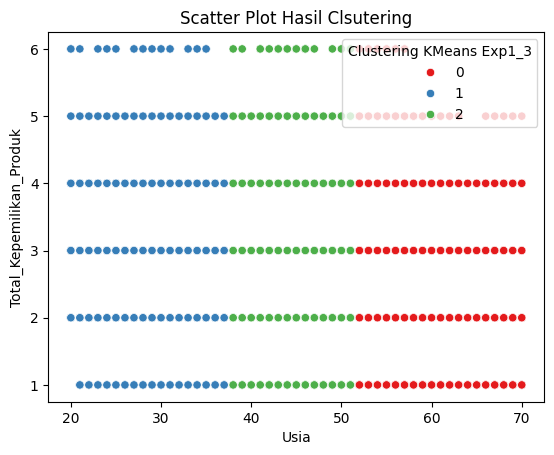

In [ ]:
sns.scatterplot(data=data0, x='Usia', y='Total_Kepemilikan_Produk', hue='Clustering KMeans Exp1_3', palette='Set1')
plt.title('Scatter Plot Hasil Clsutering')
plt.show()

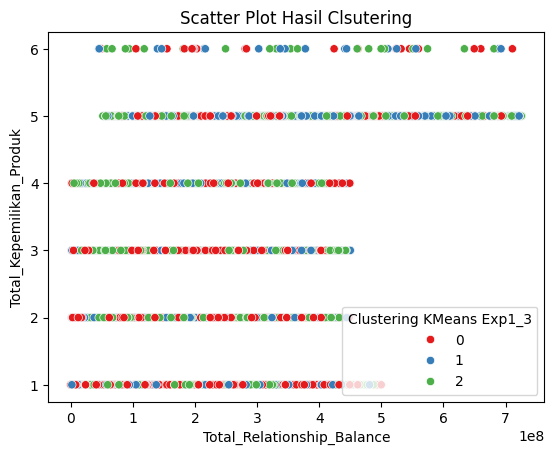

In [ ]:
sns.scatterplot(data=data0, x='Total_Relationship_Balance', y='Total_Kepemilikan_Produk', hue='Clustering KMeans Exp1_3', palette='Set1')
plt.title('Scatter Plot Hasil Clsutering')
plt.show()

In [ ]:
cluster_means = data0[['Usia', 'Jumlah_Anak', 'Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit', 'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan', 'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk', 'Total_Relationship_Balance']]
print(cluster_means)

      Usia  Jumlah_Anak  Produk_Tabungan  Produk_Deposito  \
0     23.0            0                1                0   
1     30.0            0                1                0   
2     29.0            0                1                0   
3     49.0            0                1                0   
4     21.0            0                1                0   
...    ...          ...              ...              ...   
8648  54.0            0                1                1   
8649  58.0            0                1                1   
8650  42.0            3                1                1   
8651  44.0            1                1                1   
8652  33.0            2                1                1   

      Produk_Kartu_Kredit  Produk_Kredit_Rumah  Produk_Kredit_Kendaraan  \
0                       0                    0                        0   
1                       0                    0                        0   
2                       0                 

Group 0

In [ ]:
data0[data0['Clustering KMeans Exp1_3'] == 0][['Usia', 'Total_Kepemilikan_Produk', 'Total_Relationship_Balance']].describe(include='all')

,Usia,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2405.000000,2405.000000,2.405000e+03
mean,58.063617,2.955509,2.379434e+08
std,5.298230,1.053131,1.382820e+08
min,52.000000,1.000000,1.028000e+03
25%,54.000000,2.000000,1.245667e+08
50%,57.000000,3.000000,2.322131e+08
75%,61.000000,4.000000,3.491686e+08
max,70.000000,6.000000,7.181097e+08


In [ ]:
data0[data0['Clustering KMeans Exp1_3']==0][['Area']].value_counts(normalize=True)

Area    
Jakarta     0.482328
Bandung     0.163825
Solo        0.125572
Surabaya    0.125572
Jogja       0.074012
Bogor       0.028690
Name: proportion, dtype: float64

In [ ]:
data0[data0['Clustering KMeans Exp1_3']==0][['Vintage']].value_counts(normalize=True)

Vintage    
2 - 3 Tahun    0.486486
< 1 Tahun      0.310603
> 4 Tahun      0.202911
Name: proportion, dtype: float64

In [ ]:
data0[data0['Clustering KMeans Exp1_3']==0][['Pendidikan']].value_counts(normalize=True)

Pendidikan          
Sarjana                 0.265281
SD                      0.197089
SMA                     0.179626
Tidak Sekolah Formal    0.103950
Doktor                  0.086486
SMP                     0.083992
Magister                0.083576
Name: proportion, dtype: float64

In [ ]:
data0[data0['Clustering KMeans Exp1_3']==0][['Jenis_Kelamin']].value_counts(normalize=True)

Jenis_Kelamin
Laki-laki        0.672765
Perempuan        0.327235
Name: proportion, dtype: float64

In [ ]:
data0[data0['Clustering KMeans Exp1_3']==0][['Usia']].value_counts(normalize=True)

Usia
55.0    0.120998
52.0    0.113514
54.0    0.104366
53.0    0.101040
59.0    0.064865
57.0    0.064449
56.0    0.059459
58.0    0.057380
60.0    0.049480
69.0    0.034096
70.0    0.031601
62.0    0.027859
65.0    0.026611
64.0    0.025780
66.0    0.025780
67.0    0.024532
68.0    0.023701
63.0    0.022869
61.0    0.021622
Name: proportion, dtype: float64

Group 1

In [ ]:
data0[data0['Clustering KMeans Exp1_3']==1][['Usia', 'Total_Kepemilikan_Produk', 'Total_Relationship_Balance']].describe(include='all')

,Usia,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3305.000000,3305.000000,3.305000e+03
mean,29.503177,3.243873,2.439352e+08
std,4.254972,1.008655,1.452356e+08
min,20.000000,1.000000,1.016565e+06
25%,26.000000,3.000000,1.222784e+08
50%,30.000000,3.000000,2.408255e+08
75%,33.000000,4.000000,3.578412e+08
max,37.000000,6.000000,7.228870e+08


In [ ]:
data0[data0['Clustering KMeans Exp1_3']==1][['Area']].value_counts(normalize=True)

Area    
Jakarta     0.476248
Bandung     0.179728
Surabaya    0.126475
Solo        0.118306
Jogja       0.073222
Bogor       0.026021
Name: proportion, dtype: float64

In [ ]:
data0[data0['Clustering KMeans Exp1_3']==1][['Vintage']].value_counts(normalize=True)

Vintage    
2 - 3 Tahun    0.501967
< 1 Tahun      0.293192
> 4 Tahun      0.204841
Name: proportion, dtype: float64

In [ ]:
data0[data0['Clustering KMeans Exp1_3']==1][['Pendidikan']].value_counts(normalize=True)

Pendidikan          
Sarjana                 0.274130
SMA                     0.192436
SD                      0.180333
Doktor                  0.097731
Magister                0.087443
SMP                     0.084720
Tidak Sekolah Formal    0.083207
Name: proportion, dtype: float64

In [ ]:
data0[data0['Clustering KMeans Exp1_3']==1][['Jenis_Kelamin']].value_counts(normalize=True)

Jenis_Kelamin
Laki-laki        0.640847
Perempuan        0.359153
Name: proportion, dtype: float64

In [ ]:
data0[data0['Clustering KMeans Exp1_3']==1][['Usia']].value_counts(normalize=True)

Usia
32.0    0.081997
30.0    0.081089
28.0    0.079576
25.0    0.077761
27.0    0.077156
26.0    0.074735
34.0    0.072920
29.0    0.071710
31.0    0.071710
33.0    0.067776
36.0    0.044478
37.0    0.044175
35.0    0.043873
24.0    0.025719
23.0    0.022995
22.0    0.022390
21.0    0.020877
20.0    0.019062
Name: proportion, dtype: float64

Group 2

In [ ]:
data0[data0['Clustering KMeans Exp1_3']==2][['Usia', 'Total_Kepemilikan_Produk', 'Total_Relationship_Balance']].describe(include='all')

,Usia,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2943.000000,2943.000000,2.943000e+03
mean,44.974856,3.158342,2.384758e+08
std,3.976996,1.038061,1.439379e+08
min,38.000000,1.000000,1.587496e+06
25%,42.000000,2.000000,1.178243e+08
50%,45.000000,3.000000,2.325173e+08
75%,48.000000,4.000000,3.468223e+08
max,51.000000,6.000000,7.259942e+08


In [ ]:
data0[data0['Clustering KMeans Exp1_3']==2][['Area']].value_counts(normalize=True)

Area    
Jakarta     0.481821
Bandung     0.163099
Surabaya    0.132518
Solo        0.113829
Jogja       0.081210
Bogor       0.027523
Name: proportion, dtype: float64

In [ ]:
data0[data0['Clustering KMeans Exp1_3']==2][['Vintage']].value_counts(normalize=True)

Vintage    
2 - 3 Tahun    0.505607
< 1 Tahun      0.295957
> 4 Tahun      0.198437
Name: proportion, dtype: float64

In [ ]:
data0[data0['Clustering KMeans Exp1_3']==2][['Pendidikan']].value_counts(normalize=True)

Pendidikan          
Sarjana                 0.269113
SD                      0.185865
SMA                     0.180428
SMP                     0.096840
Doktor                  0.092083
Magister                0.089365
Tidak Sekolah Formal    0.086306
Name: proportion, dtype: float64

In [ ]:
data0[data0['Clustering KMeans Exp1_3']==2][['Jenis_Kelamin']].value_counts(normalize=True)

Jenis_Kelamin
Laki-laki        0.675841
Perempuan        0.324159
Name: proportion, dtype: float64

In [ ]:
data0[data0['Clustering KMeans Exp1_3']==2][['Usia']].value_counts(normalize=True)

Usia
50.0    0.095481
51.0    0.093102
42.0    0.082229
45.0    0.074074
46.0    0.073055
48.0    0.072715
43.0    0.072035
47.0    0.071696
41.0    0.070336
40.0    0.069317
44.0    0.068977
49.0    0.058104
39.0    0.051648
38.0    0.047231
Name: proportion, dtype: float64

Dari hasil clustering, yang menjadi pembeda adalah usia. Namun, bila hanya dari segi usia kita belum bisa melakukan segmentasi nasabah dengan baik (dilihat dari silhouette score yang masih belum mencapai 0,7). Hal yang dapat dilakukan ke depannya adalah dengan memperbanyak variabel dan melakukan iterasi lebih banyak.